# *Simple Linear Regression*
This notebook studies the relationship between the number of vaccinated personnel and death using different machine-learning methods.

### *Problem Understanding*
Covid-19 has become a global pandemic and is affecting all nations worldwide. The emerging threat posed by the Covid-19 pandemic has affected every aspect of our lives, including our active lifestyle, economy, social fabric, and healthcare sector. The government and other countries have been working together to fight this tough battle. As IT professionals, my team is tasked to develop one intuitive and intelligent tool for users to understand better the situation of Covid-19 in Singapore and other countries.

### *Analytic approach*
The number of deaths is a continuous variable. We can use the simple linear regression method so that the number of deaths is our dependent variable and the vaccination percentage is our independent variable.

### *Data requirements and Data Collection*
We need a table of vaccination statistics from all over the world to understand the relationship. We also need to know the population of every country in the world and the number of deaths from COVID-19.

First of all, we <font color=green>import</font> the libraries required in this project:

In [2]:
# Import Skcit-Learn methods we want to use in this notebook
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import useful Libraries
import pylab as pl
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
mortality = pd.read_csv(r'C:\Users\motor\OneDrive\Desktop\SIT Y1S1\INF1002 Programming fundamentals\python first project\covid-vaccination-vs-death_ratio.csv')
#mortality is the name of the dataframe here
mortality.head()
#This is a dataset with 26622 lines of data regarding total vaccinations, people vaccinated, and new deaths by country and date

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


In [4]:
mortality.describe()

,Unnamed: 0,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
count,32911.000000,3.291100e+04,3.291100e+04,3.291100e+04,32911.000000,3.291100e+04,32911.000000
mean,16455.000000,3.689489e+07,2.035846e+07,1.471013e+07,100.043116,5.164060e+07,41.971287
std,9500.731691,1.411509e+08,7.843235e+07,5.735093e+07,339.500099,1.645294e+08,28.970518
min,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,-2440.000000,1.373000e+03,0.000011
25%,8227.500000,7.289180e+05,4.571090e+05,2.313500e+05,1.000000,2.962425e+06,13.697569
50%,16455.000000,4.552479e+06,2.724528e+06,1.693674e+06,9.000000,1.034057e+07,41.530473
75%,24682.500000,2.065201e+07,1.158203e+07,7.907290e+06,49.000000,3.826123e+07,68.147335
max,32910.000000,3.243599e+09,1.275541e+09,1.240777e+09,11447.000000,1.447065e+09,124.737373


In [5]:
mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


In [6]:
mortality["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Ethiopia',
       'Falkland Islands (Malvinas)', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       

# Evaluation
To measure the accuracy of a regression model, we compare the actual and projected values. Evaluation metrics play an important part in the development of a model since they give insight into areas that need to be improved. There are several model assessment metrics; in this case, we'll use MSE to determine the accuracy of our model based on the test set:

Mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:

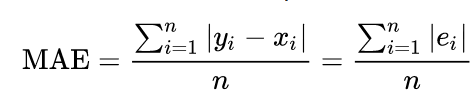

The mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate:

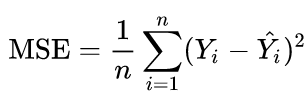

Root Mean Squared Error (RMSE) is the standard deviation of the residuals (prediction errors):

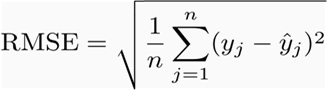

R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R^2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

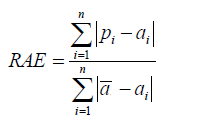

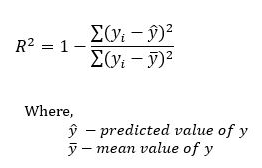

Coefficients: 0.04612531305935468
Intercept: 7.2604881433191935


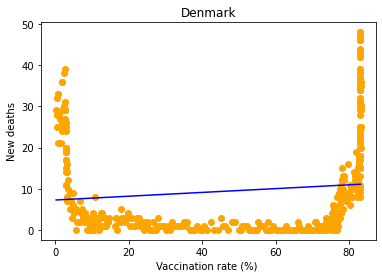

Mean absolute error: 9.67
Residual sum of squares (MSE): 147.03
R2-score: 0.01


In [9]:
# We put the data from Spain in the mortality variable .
mydf = mortality[mortality.country == "Denmark"]

# Create an object to build a linear regression model from Scikit-Learn Library. 
regr = linear_model.LinearRegression()

# We define training variables via Numpy in arrays .
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])

# Using fit(x, y) method of Scikit-Learn object, we fit the model on the training variables.
regr.fit (train_x, train_y)

# The coefficients and Intercept of this Simple Linear Regression
print(f'Coefficients: {regr.coef_[0][0]}')
print(f'Intercept: {regr.intercept_[0]}')

# Now it is time to draw the line we want using Coefficients and Intercept. 
plt.scatter(mydf.ratio, mydf.New_deaths,  color='orange') 
XX = train_x
YY = regr.intercept_[0] + regr.coef_[0][0]*train_x   # y = Intercept + (Coeff * VaccinationRate)
# Plotting Regression Line
plt.plot(XX, YY, color='blue')
plt.title("Denmark")
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

# Calculate Predicted values by this model
test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
predict_y = regr.predict(train_x)

# Using Predicted values to mesure Error of this model
# Mean absolute error
MAE = np.mean(np.absolute(predict_y  - test_y))  
print(f"Mean absolute error: {MAE:.2f}")

# Mean squared error
MSE =  np.mean((predict_y  - test_y) ** 2)
print(f"Residual sum of squares (MSE): {MSE:.2f}")

# R2-score
r2 = r2_score(test_y , predict_y)
print(f"R2-score: {r2:.2f}")

Coefficients: -1.6685972952189372
Intercept: 199.02825152007856


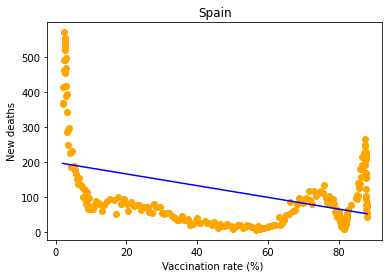

Mean absolute error: 82.61
Residual sum of squares (MSE): 11909.81
R2-score: 0.19


In [10]:
# We put the data from Spain in the mortality variable .
mydf = mortality[mortality.country == "Spain"]

# Create an object to build a linear regression model from Scikit-Learn Library. 
regr = linear_model.LinearRegression()

# We define training variables via Numpy in arrays .
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])

# Using fit(x, y) method of Scikit-Learn object, we fit the model on the training variables.
regr.fit (train_x, train_y)

# The coefficients and Intercept of this Simple Linear Regression
print(f'Coefficients: {regr.coef_[0][0]}')
print(f'Intercept: {regr.intercept_[0]}')

# Now it is time to draw the line we want using Coefficients and Intercept. 
plt.scatter(mydf.ratio, mydf.New_deaths,  color='orange') 
XX = train_x
YY = regr.intercept_[0] + regr.coef_[0][0]*train_x   # y = Intercept + (Coeff * VaccinationRate)

# Plotting Regression Line
plt.plot(XX, YY, color='blue')
plt.title("Spain")
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()

# Calculate Predicted values by this model
test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
predict_y = regr.predict(train_x)

# Using Predicted values to mesure Error of this model
# Mean absolute error
MAE = np.mean(np.absolute(predict_y  - test_y))  
print(f"Mean absolute error: {MAE:.2f}")

# Mean squared error
MSE =  np.mean((predict_y  - test_y) ** 2)
print(f"Residual sum of squares (MSE): {MSE:.2f}")

# R2-score
r2 = r2_score(test_y , predict_y)
print(f"R2-score: {r2:.2f}")

## Takeaways:

- the **R2-score: 0.19** for Spain and **R2-score: 0.01** for Denmark. This shows a very poor relationship the accounts for the variation;

- This data comparison would have been better suited for with Polynomial regression modeling as the plot graph is **curved**. Therefore, **Polynomial regression** may be preferable

- It seems that as more people are fully vaccinated, there are fewer deaths.

- It seems that this data was taken from before covid's peak amount of deaths before people were vaccinated through the deaths spiking and lowering. **Time** should be factored in as a constraint to shape the data

# Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. The goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable (or vector of independent variables) x.

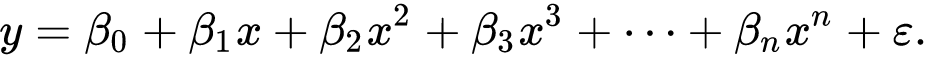


Let test out whether polynomial regression would be reliable to use this data.

We define the **```plot_vaccine_mortality()```** function, which has three variables: ```country_name```, ```dataframe```, and ```degree```. 

In [11]:
def plot_vaccine_mortality(country_name, df, degree=2):
    """
    This function receives the dataset and the name of the country and dgree then divides
    data into two parts the [test] and [train]. And a polynomial regression model applies to 
    training data.Then evaluate the model using test data and prints the results. 
    how to use:
    >>> plot_vaccine_mortality("Italy", df, 8)
    """
    #---------------------------
    print(f"{country_name:-^80}")
    # Store country data in a variable 
    mydf = mortality[mortality.country == country_name]
    
    # Divide data randomly into two test and training sections 
    msk = np.random.rand(len(mydf)) < .8
    train = mydf[msk]
    test = mydf[~msk]
    
    # Identify the dependent(y) and independent variables(x) in the train dataframe
    train_x = np.asanyarray(train[['ratio']])
    train_y = np.asanyarray(train[['New_deaths']])
    
    # Identify the dependent(y) and non-dependent(x) variables in the test dataframe
    test_x = np.asanyarray(train[['ratio']])
    test_y = np.asanyarray(train[['New_deaths']])
    
    # Generate polynomial and interaction features Object with our desired degree  
    poly = PolynomialFeatures(degree=degree)
    
    # In this section, we make a number of variables with different degrees from 
    # independent variables(x) to use them in a multiple regression model.
    train_x_poly = poly.fit_transform(train_x)
    
    # Make the model 
    clf = linear_model.LinearRegression()
    train_y_ = clf.fit(train_x_poly, train_y)
    
    # Print The coefficients
    print ('Coefficients: ')
    for i, c in enumerate(clf.coef_[0]):
        if i: print(f"{c:->22.10f} * X^{i}")
            
    # Print The Intercept    
    print ('Intercept: ',clf.intercept_[0])
    
    # Constructing a scatterplot using train data with random color
    plt.scatter(train.ratio, train.New_deaths,  color= np.random.rand(3,))
    
    # Set the X axis using numpy:   np.arange(start, end, interval)
    XX = np.arange(train_x[0], train_x[-1], 0.1)
    
    # Set the Y axis using intercept and coefficients that we found in previous steps
    YY = clf.intercept_[0] 
    for d in range(1,degree+1):
        YY += clf.coef_[0][d]*np.power(XX, d)
        
    # On the previous scatterplot, we fit the regression model with red color. 
    plt.plot(XX, YY, '-r' )
    plt.title(country_name)
    plt.xlabel("Vaccination rate (%) ")
    plt.ylabel("New deaths")
    plt.show()
    
    # Now it's time to evaluate the model we build 
    # Calculate Predicted values by this model
    test_x_poly = poly.fit_transform(test_x)
    predict_y = clf.predict(test_x_poly)
    
    # Using Predicted values to mesure Error of this model
    # Mean absolute error
    MAE = np.mean(np.absolute(predict_y - test_y))  
    print(f"Mean absolute error: {MAE:.2f}")
    
    # Mean squared error
    MSE =  np.mean((predict_y - test_y) ** 2)
    print(f"Residual sum of squares (MSE): {MSE:.2f}")
    
    # R2-score
    r2 = r2_score(test_y, predict_y)
    print(f"R2-score: {r2:.2f}")
    #---------------------------
    print("-"*80)

### Now we return to Spain's country's data and try to apply a polynomial regression model with degree of 3.

-------------------------------------Spain--------------------------------------
Coefficients: 
---------22.1623189529 * X^1
----------0.3698927418 * X^2
----------0.0017691521 * X^3
Intercept:  394.04266285022373


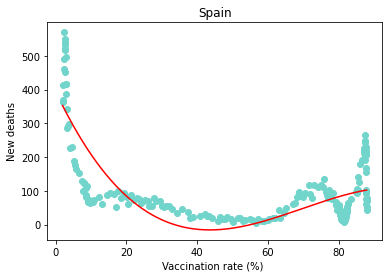

Mean absolute error: 58.87
Residual sum of squares (MSE): 5620.42
R2-score: 0.62
--------------------------------------------------------------------------------


In [12]:
plot_vaccine_mortality("Spain", mortality, 3)

Despite the fact that R2-score has improved from 0.19 to 0.62, it can still be better. Therefore, we increase the degree of regression to create a model with the least error. (Note that because the data is randomly divided into test and train part, their value may be slightly different in different runs.)

|| 1 | 2 | 3 | 4 | 5 | **6** | 7 | 8 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **R2-Score** | 0.20 | 0.59 | 0.63 | 0.79 | 0.77| **0.87** | 0.85 | 0.84 | 

- The polynomial regression of Spain data generates the least amount of error in the **sixth degree**

# **Plotting other countries in sixth degree**

-----------------------------------Singapore------------------------------------
Coefficients: 
----------0.3455837839 * X^1
----------0.0549460247 * X^2
----------0.0031167685 * X^3
----------0.0000775861 * X^4
----------0.0000008652 * X^5
----------0.0000000035 * X^6
Intercept:  -0.4113808720141847


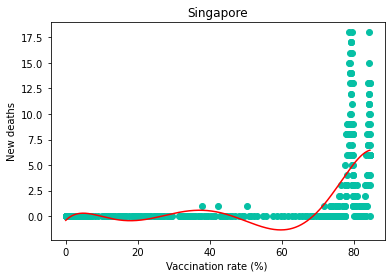

Mean absolute error: 2.29
Residual sum of squares (MSE): 12.35
R2-score: 0.36
--------------------------------------------------------------------------------


In [9]:
plot_vaccine_mortality("Singapore", mortality, 6)

-------------------------------The United Kingdom-------------------------------
Coefficients: 
--------184.9441897512 * X^1
---------19.7992151999 * X^2
----------0.7566669890 * X^3
----------0.0141004762 * X^4
----------0.0001292681 * X^5
----------0.0000004655 * X^6
Intercept:  690.2620182204059


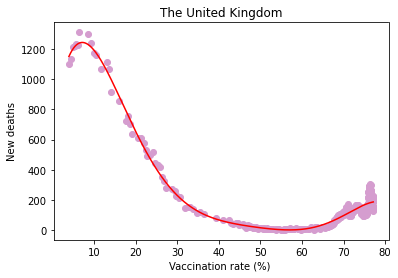

Mean absolute error: 24.70
Residual sum of squares (MSE): 1275.88
R2-score: 0.98
--------------------------------------------------------------------------------


In [10]:
plot_vaccine_mortality("The United Kingdom", mortality, 6)

----------------------------United States of America----------------------------
Coefficients: 
--------367.1132920619 * X^1
---------50.3583293799 * X^2
----------2.2748020972 * X^3
----------0.0493409905 * X^4
----------0.0005224617 * X^5
----------0.0000021535 * X^6
Intercept:  2452.04414234626


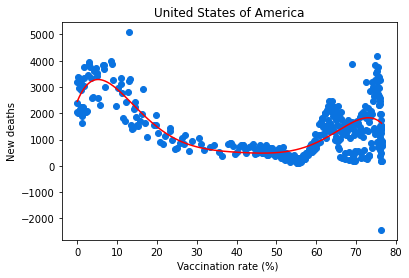

Mean absolute error: 530.31
Residual sum of squares (MSE): 526116.70
R2-score: 0.53
--------------------------------------------------------------------------------


In [11]:
plot_vaccine_mortality("United States of America", mortality, 6)

------------------------------------Denmark-------------------------------------
Coefficients: 
----------9.0056188964 * X^1
----------0.7920436750 * X^2
----------0.0327857573 * X^3
----------0.0006849729 * X^4
----------0.0000069865 * X^5
----------0.0000000276 * X^6
Intercept:  39.026639669200655


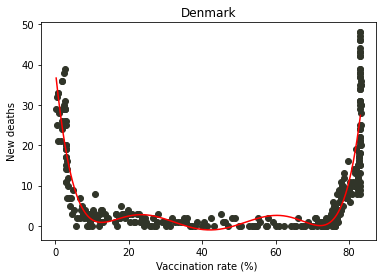

Mean absolute error: 3.72
Residual sum of squares (MSE): 33.93
R2-score: 0.78
--------------------------------------------------------------------------------


In [14]:
plot_vaccine_mortality("Denmark", mortality, 6)

-------------------------------------India--------------------------------------
Coefficients: 
-------1112.4741211746 * X^1
--------399.3157989735 * X^2
---------43.1102207640 * X^3
----------2.1950775411 * X^4
----------0.0606151410 * X^5
----------0.0009347162 * X^6
----------0.0000075781 * X^7
----------0.0000000252 * X^8
Intercept:  796.7367366904493


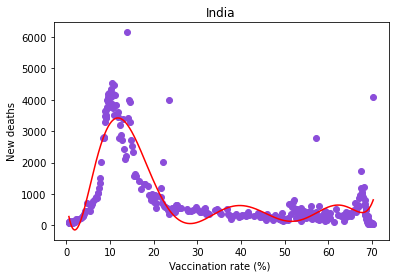

Mean absolute error: 386.96
Residual sum of squares (MSE): 334620.47
R2-score: 0.78
--------------------------------------------------------------------------------


In [16]:
plot_vaccine_mortality("India", mortality, 8)

-----------------------------------Australia------------------------------------
Coefficients: 
----------8.8407340174 * X^1
----------2.3332253419 * X^2
----------0.2325002142 * X^3
----------0.0113301401 * X^4
----------0.0002981777 * X^5
----------0.0000043183 * X^6
----------0.0000000323 * X^7
----------0.0000000001 * X^8
Intercept:  -5.874387040249349


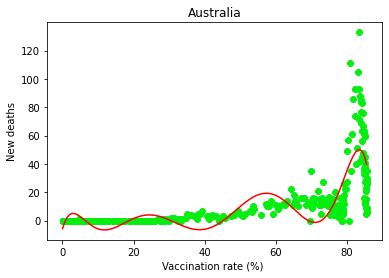

Mean absolute error: 9.68
Residual sum of squares (MSE): 205.99
R2-score: 0.58
--------------------------------------------------------------------------------


In [18]:
plot_vaccine_mortality("Australia", mortality, 8)

## Takeaways:

- the **R2-score** for every country has improved. Showing a strong correlation between the deaths and vaccination rate.

- It seems that as more people are fully vaccinated, there are fewer deaths.

- The data was taken from before covid's peak amount of deaths before people were vaccinated through the deaths spiking and lowering. **Time** should be factored in as a constraint to shape the data
